# Heart Disease Analysis & Prediction

<a id='intro'></a>
### Introduction

In this work, A Dataset is visualized to understand the factors that led to a heart disease. Further, A Machine Learning model is developed to predict an underlying heart disease in a patient.

The data was selected from a [KAGGLE](https://www.kaggle.com/ronitf/heart-disease-uci) which contained over 303 data entries with 14 parameters.

## Table of Contents
<ul>
<li><a href="#wrangle">I.  Data Wrangling</a></li>
<li><a href="#visual">II.  Data Visualization</a></li>
<li><a href="#ml">III. Machine Learning</a></li>
<li><a href="#test">IV.  Testing</a></li>
</ul>

#### Data Description

| Column Name | Description | DType |
| :- | :-| :- |
| age | Age of the person | int64|
| sex | Gender of the person (1 = male; 0 = female) | int64|
| cp | Chest Pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic )| int64|
| trestbps | resting blood pressure (in mm Hg) | int64|
| chol | cholestoral in mg/dl fetched via BMI sensor | int64|
| fbs | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) | int64|
| restecg | resting electrocardiographic results ( 0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria)| int64|
| thalach | maximum heart rate achieved | int64|
| exang | exercise induced angina (1 = yes; 0 = no) | int64|
| oldpeak | ST depression induced by exercise relative to rest | float64|
| slope | Slope ( 1= upsloping; 2= flat; 3= downsloping) | int64|
| ca | number of major vessels (0-3) colored by flourosopy | int64|
| thal | Thal rate(3 = normal; 6 = fixed defect; 7 = reversable defect) | int64|
| target | diagnosis of heart disease (angiographic disease status) (0: < 50% diameter narrowing; 1: > 50% diameter narrowing) | int64|


<i> ***Information obtained from Kaggle & [University of California Irvine](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) </i>

<a id='wrangle'></a>
## I. Data Wrangling
> importing libraries and dataset <br>
understanding data quality <br>
data cleaning <br>

In [197]:
# import esential packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
#Import datasets 
df=pd.read_csv('heart.csv') #heart dataset

In [199]:
#understanding the heart dataframe
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [200]:
df.shape #number of Column & Rows in dataframe

(303, 14)

In [201]:
#understanding datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [202]:
#Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [203]:
#Describing Dataframe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Cleaning
> Checking for NULL Values, Duplicate Values Etc.

In [204]:
#NULL Value Check
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [205]:
#Duplicate Value Check
sum(df.duplicated())

1

In [206]:
print(df[df.duplicated()]) #displaying the duplicate value(s)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [207]:
df.drop_duplicates(inplace=True) #removing duplicate Values

In [208]:
#verifying for any null values in the DataFrame
df.isna().sum()  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [209]:
#converting qualitative dtype (nominal/ordinal) dtype to catagorical
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')

In [210]:
#Converting binary columns to boolean
df['fbs'] = df['fbs'].astype('bool')
df['exang'] = df['exang'].astype('bool')
df['target'] = df['target'].astype('bool')

In [211]:
#Quantitative attributes
quant_df = df.loc[:, (df.dtypes == np.float64) | (df.dtypes == np.int64)]
quant_df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [212]:
#Categorical attributes
cat_df = df.loc[:, (df.dtypes == 'object') | (df.dtypes == 'category')]
cat_df.columns

Index(['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], dtype='object')

In [213]:
#Binary attributes
bin_df = df.loc[:, (df.dtypes == 'bool')]
bin_df.columns

Index(['fbs', 'exang', 'target'], dtype='object')

In [214]:
#filtering Quantitative & Catagorical Columns
num_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] #numeric vars

bool_vars= ['fbs', 'exang', 'target'] #Bool vars

cat_vars = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'] #Categorical attributes

<a href="#visual"></a>
## II. Data Visualization
>Exploratory Data Analysis <i> ( Univariate, Bivariate, Multivariate Analysis etc. )</i> <br>

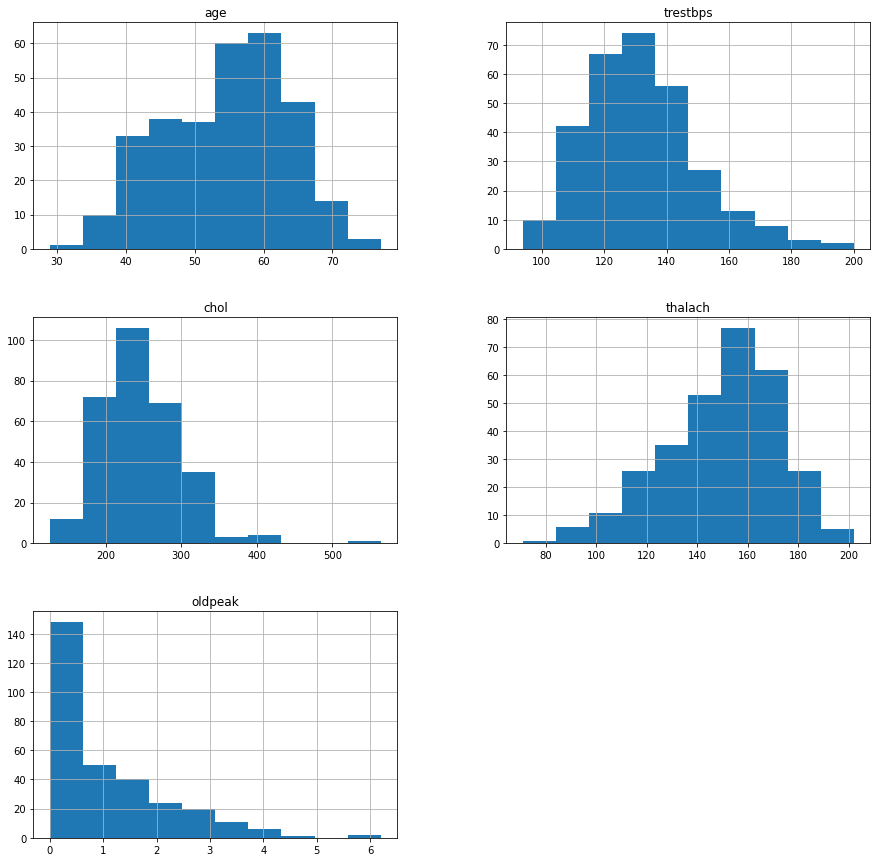

In [215]:
#Histogram plot 
plot = df.hist(figsize = (15,15))

In [216]:
#Distribution plot 
#plt.figure(figsize=(15,15))

#for i, column in enumerate(df.columns, 1):
   # plt.subplot(4,4,i)
   # sns.distplot(df[column])

<Figure size 432x288 with 0 Axes>

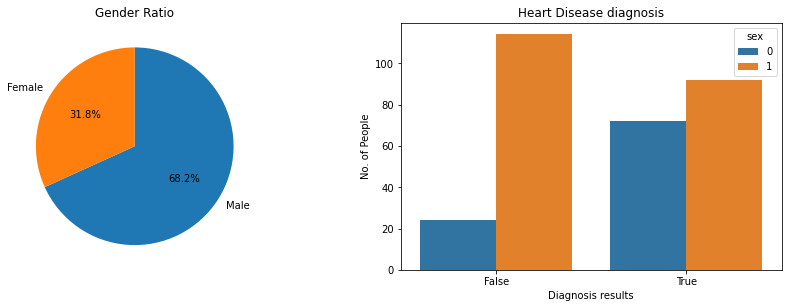

In [217]:
plt.figure(1)
plt.figure(figsize=(15,10))

#Gender participation in tests
plt.subplot(221)

#Sex (1 = male; 0 = female) 
sex_count=df['sex'].value_counts()
sex_label=['Male','Female']
plt.pie(sex_count, labels=sex_label,startangle = 90,counterclock = False, autopct= '%.1f%%')

# Headings
plt.title("Gender Ratio")

##-------------------

# Heart Disease diagnosis 
plt.subplot(222)
sns.countplot(x='target', hue='sex', data=df)

# Headings
plt.xlabel('Diagnosis results') #target
plt.ylabel('No. of People')
plt.title("Heart Disease diagnosis")

plt.show()

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

<Figure size 432x288 with 0 Axes>

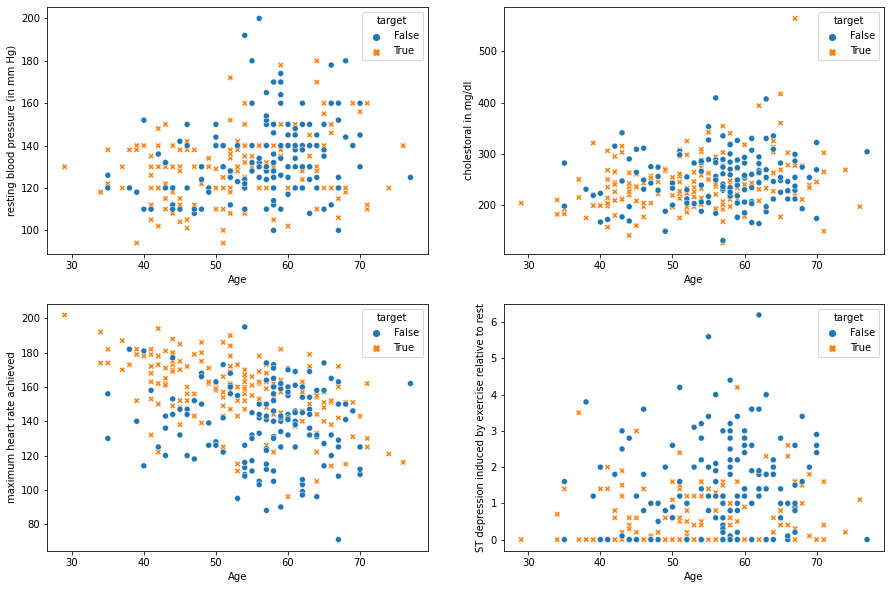

In [218]:
#Effect of Age vs Numeric vars
plt.figure(2)
plt.figure(figsize=(15,10))

#Resting Blood Pressure Vs Age
plt.subplot(221)
sns.scatterplot(data=df, x='age', y='trestbps', hue='target', style='target')

plt.xlabel('Age')
plt.ylabel('resting blood pressure (in mm Hg)')
##-------------------

#Cholestrol Vs Age
plt.subplot(222)
sns.scatterplot(data=df, x='age', y='chol', hue='target', style='target')

plt.xlabel('Age')
plt.ylabel('cholestoral in mg/dl')

##-------------------

#Cholestrol Vs Age
plt.subplot(223)
sns.scatterplot(data=df, x='age', y='thalach', hue='target', style='target')

plt.xlabel('Age')
plt.ylabel('maximum heart rate achieved')

##-------------------

#Cholestrol Vs Age
plt.subplot(224)
sns.scatterplot(data=df, x='age', y='oldpeak', hue='target', style='target')

plt.xlabel('Age')
plt.ylabel('ST depression induced by exercise relative to rest')

Text(13.082378472222231, 0.5, 'resting blood pressure (in mm Hg)')

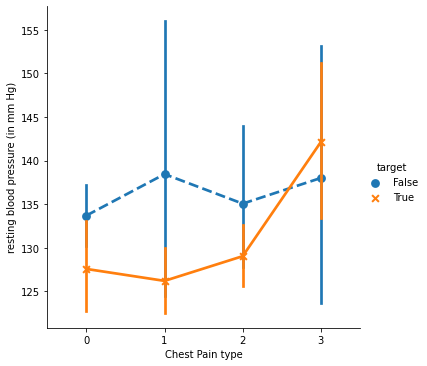

In [219]:
#Chestpain vs Resting Blood Pressure
sns.catplot(data=df, x="cp", y="trestbps", hue="target",
            markers=["o", "x"], linestyles=["--", "-"],
            kind="point")

#Headings
plt.xlabel('Chest Pain type')
plt.ylabel('resting blood pressure (in mm Hg)')

Text(0, 0.5, 'Age')

<Figure size 432x288 with 0 Axes>

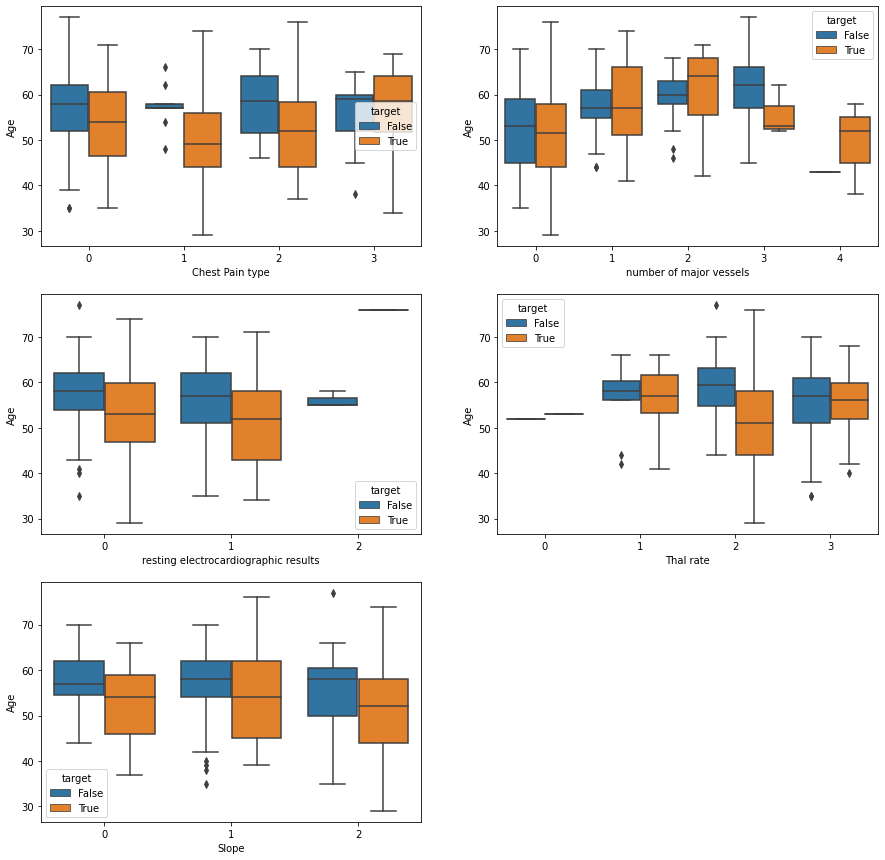

In [220]:
#Categorical Data Plots
plt.figure(3)
plt.figure(figsize=(15,15))

#------

#CP vs Age
plt.subplot(321)
sns.boxplot(x='cp',y='age',data=df, hue='target')

#Headings
plt.xlabel('Chest Pain type')
plt.ylabel('Age')

#------

#CA vs Age
plt.subplot(322)
sns.boxplot(data=df,x='ca', y='age', hue='target')

#Headings
plt.xlabel('number of major vessels')
plt.ylabel('Age')

#------

#ECG vs Age
plt.subplot(323)
sns.boxplot(data=df, x='restecg', y='age', hue='target')

#headings
plt.xlabel('resting electrocardiographic results')
plt.ylabel('Age')

#-----

#thal vs Age
plt.subplot(324)
sns.boxplot(data=df, x='thal', y='age', hue='target')

#headings
plt.xlabel('Thal rate')
plt.ylabel('Age')

#-----

#slope vs Age
plt.subplot(325)
sns.boxplot(data=df,x='slope', y='age', hue='target')

#headings
plt.xlabel('Slope')
plt.ylabel('Age')

Text(0.5, 0, 'resting electrocardiographic results')

<Figure size 432x288 with 0 Axes>

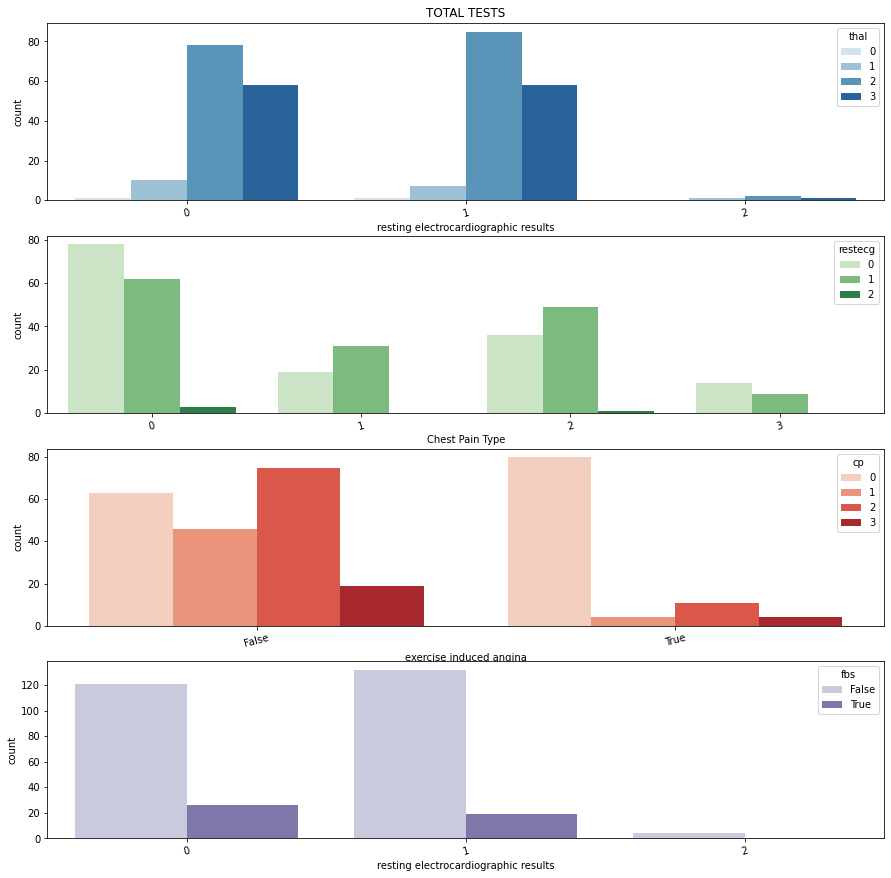

In [221]:
#multivariate data plots
plt.figure(4)
plt.figure(figsize=(15,15))

#RestECG
plt.subplot(4, 1, 1)
sns.countplot(data = df, x = 'restecg', hue = 'thal', palette = 'Blues')
plt.xticks(rotation = 15)
plt.xlabel('resting electrocardiographic results')
plt.title('TOTAL TESTS')

#Cp
plt.subplot(4, 1, 2)
sns.countplot(data=df, x='cp', hue='restecg', palette='Greens')
plt.xticks(rotation = 15)
plt.xlabel('Chest Pain Type')

#Exang
plt.subplot(4, 1, 3)
sns.countplot(data=df, x='exang', hue='cp', palette='Reds')
plt.xticks(rotation = 15)
plt.xlabel('exercise induced angina')

#RestECG vs FBS
plt.subplot(4, 1, 4)
sns.countplot(data = df, x = 'restecg', hue = 'fbs', palette = 'Purples')
plt.xticks(rotation = 15)
plt.xlabel('resting electrocardiographic results')

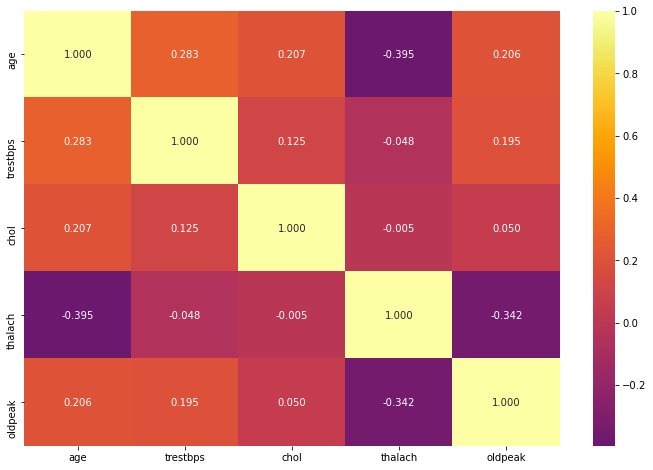

In [222]:
#Heatmap of Quant Variables
plt.figure(figsize = [12, 8])
sns.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',cmap = 'inferno',
               center = 0) 
plt.show()

C:\Users\Shivam Bhateja\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


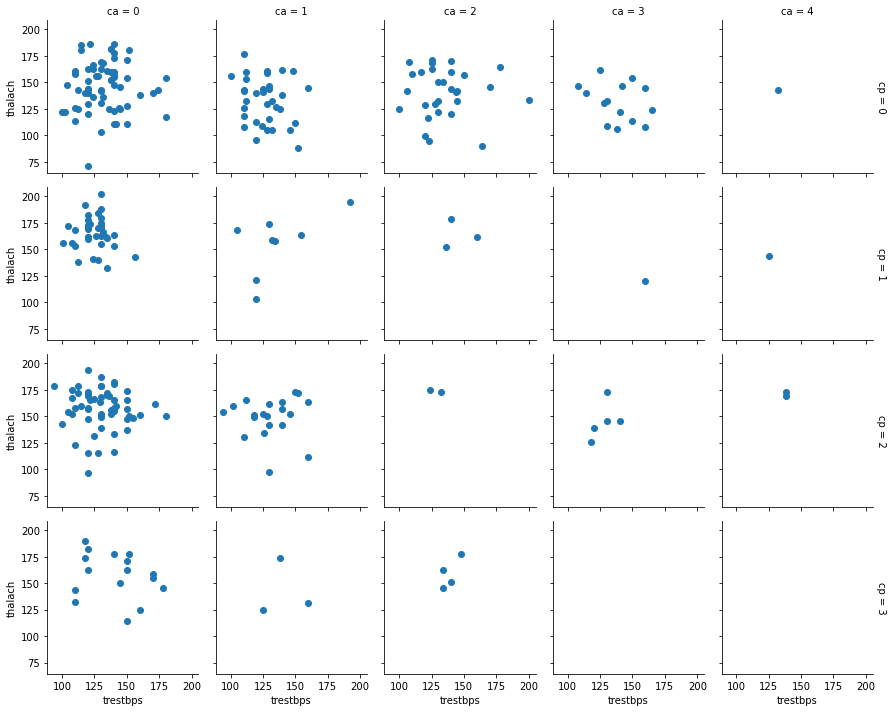

In [223]:
#Scatter plot
g = sns.FacetGrid(data = df, col = 'ca', row = 'cp', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'trestbps', 'thalach');

<a id='ml'></a>
## III. Machine Learning
>Normalization/Standardization, Feature Scaling, Model Selection, Model Training & Testing Accuracy

In [253]:
#Converting categorical data to dummy vars #df_new = pd.get_dummies(df, cat_vars)

In [260]:
from sklearn.model_selection import train_test_split #precprocessing package

#new dataframe
X = df.drop(columns='target')
y = df['target'] #output dataframe

#generating train & test set (following thumb rule of 80:20 Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#Display col&rows of Train & Test set
print('X_train size: {}, y_train size: {}'.format(X_train.shape, y_train.shape))
print('X_test size: {}, Y_test size: {}'.format(X_test.shape, y_test.shape))

X_train size: (241, 13), y_train size: (241,)
X_test size: (61, 13), Y_test size: (61,)


In [261]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test) #for Test Set, fit is not required 

### Model Selection
> Since the dataset is small, therefore only LogisticRegression & KNN (KNeighborsClassifier) is tested, out of which the one with the best accuracy will be selected

In [262]:
#Importing ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



#creating LR Classifier
lr = LogisticRegression()
lr.fit(X_train,y_train)

#Creating KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# Accuracy Score
sc_knn=knn.score(X_train,y_train)*100
sc_lr=lr.score(X_train, y_train)*100

print("Training Accuracy of KNN: {}% ".format(sc_knn) )
print("Training Accuracy of LogisticRegression: {}%".format(sc_lr))

Training Accuracy of KNN: 85.47717842323651% 
Training Accuracy of LogisticRegression: 85.06224066390041%


In [263]:
#prediction testing
y_lr = lr.predict(X_test)
y_knn = knn.predict(X_test)

#Testing Accuracy Score
SC_knn=accuracy_score(y_knn,y_test)*100
SC_lr=accuracy_score(y_lr,y_test)*100

print("Testing Accuracy of KNN : {}% ".format(SC_knn) )
print("Testing Accuracy of LogisticRegression: {}%". format(SC_lr))

Testing Accuracy of KNN : 90.1639344262295% 
Testing Accuracy of LogisticRegression: 86.88524590163934%


In [264]:
# prediction function
def heart_disease_prediction(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):
    
    age=int(age)
    trestbps=int(trestbps)
    chol=int(chol)
    thalach=int(thalach)
    
    oldpeak=float(oldpeak)
    
    fbs=bool(fbs)
    exang=bool(exang)
    
    sex=int(sex)
    cp= int(cp)
    restecg=int(restecg)
    slope=int(slope)
    ca= int(ca)
    thal= int(thal)
    
    #sex=pd.Categorical(sex, [1,0])
    #cp= pd.Categorical(cp, [3, 2, 1, 0])
    #restecg=pd.Categorical(restecg, [0, 1, 2])
    #slope=pd.Categorical(slope, [0, 1, 2])
    #ca= pd.Categorical(ca, [0, 2, 1, 3, 4])
    #thal= pd.Categorical(thal, [1, 2, 3, 0]

    x = [[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
    x = scaler.transform(x)

    return knn.predict(x)

<a id='test'></a>
## IV. Testing
> Testing with static inputs

In [265]:
# Test1
#age,sex[1,0],cp[3, 2, 1, 0],trestbps,chol,fbs[0,1],
#restecg[0, 1, 2],thalach,exang[0,1],oldpeak,slope[0, 1, 2],ca[0, 2, 1, 3, 4],thal[1, 2, 3, 0]

prediction = heart_disease_prediction(55, 1, 2, 162, 285, 1, 1, 150,1,2.5,1,2,3)[0]
if prediction:
  print('YOU ARE PRONE TO A HEART ATTACK! PLEASE VISIT A DOCTOR')
else:
  print('CONGRATS! YOU DONT HAVE A DISEASE')

CONGRATS! YOU DONT HAVE A DISEASE


In [266]:
# Test2
#age,sex[1,0],cp[3, 2, 1, 0],trestbps,chol,fbs[0,1],
#restecg[0, 1, 2],thalach,exang[0,1],oldpeak,slope[0, 1, 2],ca[0, 2, 1, 3, 4],thal[1, 2, 3, 0]

prediction = heart_disease_prediction(70, 1, 3, 150, 250, 0, 1, 150,1,2.5,1,1,0)[0]
if prediction:
  print('YOU ARE PRONE TO A HEART ATTACK! PLEASE VISIT A DOCTOR')
else:
  print("CONGRATS! YOU DONT HAVE A DISEASE")

YOU ARE PRONE TO A HEART ATTACK! PLEASE VISIT A DOCTOR
